## Introducción
---

Como primer proyecto vamos a entrenar un modelo de regresion logistica.
Para ello seleccionamos el siguiente dataset de [UCI](https://archive.ics.uci.edu/ml/datasets/adult). 
Antes de comenzar deberiamos de seguir algun proceso o métodologia que nos guie en el desarrollo de este proyecto.
Por suerte para nuestra ayuda existe una métodologia llamada **[CRISP-DM](http://crisp-dm.eu/)**, esta métodología cuenta con 6 etapas,las cuales son:

- Comprensión del negocio
- Entendimiento y analisis de los datos
- Preparacion de los datos
- Modelado
- Evaluación
- Despliegue

Iremos avanzando en el proyecto, paso a paso aplicando cada una de las etapa de **CRISP-DM**. 
Mas adelante dedicaremos un post para hablar de esta metodología en profundidad, asi que por el momento manos a la obra!!!.
![Proceso CRISP-DM](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/220px-CRISP-DM_Process_Diagram.png)

### Comprender el problema
---
Basandonos en la informacion adjunta al dataset el objetivo del problema es **clasificar** en base a **dos clases** si una persona gana mas, o menos de $50000 dolares al año, en base a un conjunto de atributos.

### Analisis de los datos
---
El dataset cuenta con 15 atributos incluyendo la variable Objetivo, esta dividio en un dos partes para el proposito de entrenamiento y el otro para test. La cantidad de instancias que posse cada conjunto es de
32560 y de 16281 respectivamente. Examinando los dataset podemos ver que los mismos no tiene los encabezados en la data, por lo que debemos leer toda documentación adjunta para poder saber los nombres de cada atributo y a que columna corresponde.

In [28]:
#Vamos a leer nuestro archivo, para ello utilizaremos una libreria muy conocida llamada pandas.
import pandas as pd

#Leemos nuestro archivo para entrenamiento
ds_training=pd.read_csv("./data/adult.data")
print("Training data instances count:\t",ds_training.shape[0])

Training data instances count:	 32560


Una vez que hemos leido toda la información y sabemos cuales son los cabezales de nuestro conjunto de datos se los agregaremos.

In [29]:
#Estos son los headers de los datos
headers=['AGE','WORKCLASS','FNLWGT','EDUCATION','EDUCATION-NUM','MARITAL-STATUS','OCCUPATION','RELATIONSHIP','RACE','SEX','CAPITAL-GAIN','CAPITAL-LOSS','HOURS-PER-WEEK','NATIVE-COUNTRY','CLASS']

#Se lo agregamos al dataset
ds_training.columns=headers

#Chequeamos que el header fue agregado.
dataset=ds_training

dataset.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE-COUNTRY,CLASS
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Como podemos **Education-NUM** y **EDUCATION** repesentan la misma informacion de diferente manera, por lo que podemos prescindir de una, en este caso eliminaremos la columna **EDUCATION** del dataset.

En cuanto a la variable **FNLWGT** es una apreciación subjetiva de cuantas personas afecta el censo ,segun las personas que realizan el censo, en este caso vamos a eliminarla. 

In [30]:
dataset = dataset.drop(['FNLWGT','EDUCATION'],  axis=1)
dataset.head()

,AGE,WORKCLASS,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE-COUNTRY,CLASS
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


#### Tipos de datos
---
Vamos a revisar los tipos de datos que tiene nuestro dataset.
Como podemos ver muchos de nuestros atributos son polinomiales, para poder utilizarlos en una regresión logistica,
debemos aplicarles algun tipo de transformacion de **Polinomial a Númerico**. Pero antes debemos hacer un chequeo de datos faltantes.

In [31]:
dataset.dtypes

AGE                int64
WORKCLASS         object
EDUCATION-NUM      int64
MARITAL-STATUS    object
OCCUPATION        object
RELATIONSHIP      object
RACE              object
SEX               object
CAPITAL-GAIN       int64
CAPITAL-LOSS       int64
HOURS-PER-WEEK     int64
NATIVE-COUNTRY    object
CLASS             object
dtype: object

#### Datos Faltantes
---
Una vez que agregamos los headers al dataset comenzaremos a revisar mas en profundidad los datos, comenzaremos por cheuqear los datos faltantes. En el caso de este dataset los datos faltantes son marcado con la cadena **" ?"**, hagamos un recuento de estos.
Para ellos **reemplazaremos** la cadena **" ?"** por el valor **NaN de numpy**, esto lo hacemos ya que **pandas nos ofrece algunas funciones para hacer el recuento de estos valores**.

In [32]:
import numpy as np
dataset=dataset.replace(" ?", value=np.nan)
dataset.isna().sum()

AGE                  0
WORKCLASS         1836
EDUCATION-NUM        0
MARITAL-STATUS       0
OCCUPATION        1843
RELATIONSHIP         0
RACE                 0
SEX                  0
CAPITAL-GAIN         0
CAPITAL-LOSS         0
HOURS-PER-WEEK       0
NATIVE-COUNTRY     583
CLASS                0
dtype: int64

ahora vamos a ver que valores contienen dichos atributos, **agrupandolos** por tipo.

In [33]:
print(dataset.groupby(['WORKCLASS']).size(),"\n")

print(dataset.groupby(['OCCUPATION']).size(),"\n")

print(dataset.groupby(['NATIVE-COUNTRY']).size())

WORKCLASS
 Federal-gov           960
 Local-gov            2093
 Never-worked            7
 Private             22696
 Self-emp-inc         1116
 Self-emp-not-inc     2541
 State-gov            1297
 Without-pay            14
dtype: int64 

OCCUPATION
 Adm-clerical         3769
 Armed-Forces            9
 Craft-repair         4099
 Exec-managerial      4066
 Farming-fishing       994
 Handlers-cleaners    1370
 Machine-op-inspct    2002
 Other-service        3295
 Priv-house-serv       149
 Prof-specialty       4140
 Protective-serv       649
 Sales                3650
 Tech-support          928
 Transport-moving     1597
dtype: int64 

NATIVE-COUNTRY
 Cambodia                         19
 Canada                          121
 China                            75
 Columbia                         59
 Cuba                             95
 Dominican-Republic               70
 Ecuador                          28
 El-Salvador                     106
 England                          90
 France

Podemos imputar valores utilizando sklearn, en este caso eliminaremos estas intancias.

In [34]:
dataset=dataset.dropna()
dataset.isna().sum()

AGE               0
WORKCLASS         0
EDUCATION-NUM     0
MARITAL-STATUS    0
OCCUPATION        0
RELATIONSHIP      0
RACE              0
SEX               0
CAPITAL-GAIN      0
CAPITAL-LOSS      0
HOURS-PER-WEEK    0
NATIVE-COUNTRY    0
CLASS             0
dtype: int64

# Detección de Outliers

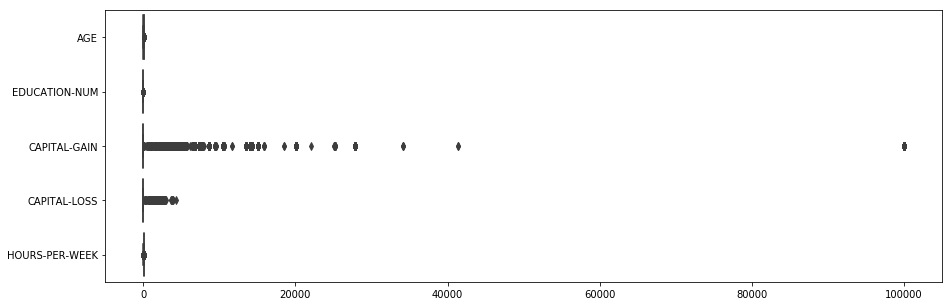

In [35]:
import seaborn as sbn
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,5))
sbn.boxplot(ax=ax, data=dataset,orient="h")

Vamos a obtener el percentil 0.98 de cada atributo de nuestro dataset

In [36]:
dataset.quantile([0.25,0.5,0.75,0.95])
dataset=dataset[dataset['AGE']< 68]
dataset=dataset[dataset['EDUCATION-NUM']< 15]
dataset=dataset[dataset['CAPITAL-GAIN']< 14344]
dataset=dataset[dataset['CAPITAL-LOSS']< 1902]
dataset=dataset[dataset['HOURS-PER-WEEK']< 70]


Vamos a verificar la correlacion entre los atributos y a graficar los mismos.

# Correlación entre los atributos

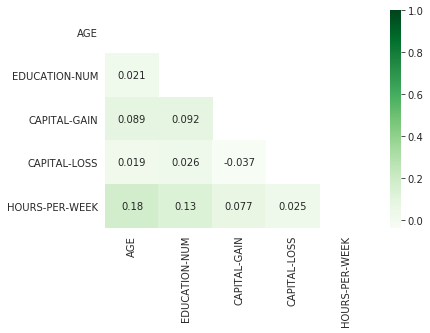

In [37]:
correlationMatrix=dataset.corr()
mask = np.zeros_like(correlationMatrix)
mask[np.triu_indices_from(mask)] = True
with sbn.axes_style("white"):
    ax = sbn.heatmap(correlationMatrix, mask=mask,cmap="Greens",annot=True)

# Conversión de datos
Ahora vamos a transformar los atributos categoricos a númericos.

In [38]:
dataset=pd.get_dummies(data=dataset,columns=['MARITAL-STATUS','RELATIONSHIP','RACE','SEX','WORKCLASS','OCCUPATION','NATIVE-COUNTRY','CLASS'],drop_first=True)

In [39]:
dataset = dataset.rename(columns={'CLASS_ >50K': 'CLASS'})
dataset.head()

,AGE,EDUCATION-NUM,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,MARITAL-STATUS_ Married-AF-spouse,MARITAL-STATUS_ Married-civ-spouse,MARITAL-STATUS_ Married-spouse-absent,MARITAL-STATUS_ Never-married,MARITAL-STATUS_ Separated,...,NATIVE-COUNTRY_ Puerto-Rico,NATIVE-COUNTRY_ Scotland,NATIVE-COUNTRY_ South,NATIVE-COUNTRY_ Taiwan,NATIVE-COUNTRY_ Thailand,NATIVE-COUNTRY_ Trinadad&Tobago,NATIVE-COUNTRY_ United-States,NATIVE-COUNTRY_ Vietnam,NATIVE-COUNTRY_ Yugoslavia,CLASS
0,50,13,0,0,13,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,38,9,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,53,7,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,28,13,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,14,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Normalizacion de los datos

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
scaler.fit(dataset)

#Obtengo las columnas 
columns=dataset.columns;
normalizedData=scaler.transform(dataset)

#Obtengo un nuevo DataFrame a aprtir de los datos Normalizados entre 0 y 1
dataset=pd.DataFrame(columns=columns,data=normalizedData)
dataset.head()

,AGE,EDUCATION-NUM,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,MARITAL-STATUS_ Married-AF-spouse,MARITAL-STATUS_ Married-civ-spouse,MARITAL-STATUS_ Married-spouse-absent,MARITAL-STATUS_ Never-married,MARITAL-STATUS_ Separated,...,NATIVE-COUNTRY_ Puerto-Rico,NATIVE-COUNTRY_ Scotland,NATIVE-COUNTRY_ South,NATIVE-COUNTRY_ Taiwan,NATIVE-COUNTRY_ Thailand,NATIVE-COUNTRY_ Trinadad&Tobago,NATIVE-COUNTRY_ United-States,NATIVE-COUNTRY_ Vietnam,NATIVE-COUNTRY_ Yugoslavia,CLASS
0,0.66,0.923077,0.0,0.0,0.179104,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.42,0.615385,0.0,0.0,0.582090,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.72,0.461538,0.0,0.0,0.582090,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.22,0.923077,0.0,0.0,0.582090,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.40,1.000000,0.0,0.0,0.582090,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Entrenamiento y Validación del Modelo de Regresión Logística

Separo los atributos de la variable objetivo, para el entrenamiento del modelo.

In [41]:
from sklearn.linear_model import LogisticRegression

X= np.array(dataset.drop(['CLASS'],1))
Y = np.array(dataset['CLASS'])

model = LogisticRegression()
model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Ahora verificamos la precisión de nuestro modelo.

## Validación del modelo

In [42]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [43]:
validation_size = 0.30
seed = 2018
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X,Y, test_size=validation_size, random_state=seed)
kfold = model_selection.KFold(n_splits=10, random_state=seed)
results = model_selection.cross_val_score(model, X_train,Y_train, cv=kfold, scoring='accuracy')
print("%s: %f (%f)" % ("Regresión Logística",results.mean(), results.std()))

Regresión Logística: 0.852348 (0.011346)


In [44]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.8520527678461349


Ahora veremos la performance de nuestro modelo, mediante el reporte de clasificacion

In [45]:
print(classification_report(Y_validation, predictions))

             precision    recall  f1-score   support

        0.0       0.88      0.94      0.91      6415
        1.0       0.69      0.53      0.60      1696

avg / total       0.84      0.85      0.84      8111

